# Tutorial 2 - Read, manipulate and analyze the IMERG product

First, let's import the package required in this tutorial.

In [3]:
import gpm_api
import datetime

Let's have a look at the available IMERG products:

In [4]:
gpm_api.available_products(product_category="IMERG", product_type="RS")

['IMERG-FR']

In [5]:
gpm_api.available_products(product_category="IMERG", product_type="NRT")

['IMERG-ER', 'IMERG-LR']

# 1. Data download

Now let's download an IMERG product over a couple of hours.

In [4]:
# Specify the time period you are interested in 
start_time = datetime.datetime.strptime("2019-07-13 11:00:00", "%Y-%m-%d %H:%M:%S")
end_time = datetime.datetime.strptime("2019-07-13 13:00:00", "%Y-%m-%d %H:%M:%S")
# Specify the product and product type 
product = "IMERG-FR"  # 'IMERG-ER' 'IMERG-LR'
product_type = "RS"   # "NRT"
# Specify the version
version = 6

In [5]:
# Download the data
gpm_api.download(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    force_download=False,
    verbose=True,
    progress_bar=True,
    check_integrity=False,
)


0it [00:00, ?it/s]
0it [00:00, ?it/s]

The available GPM IMERG-FR product files are on disk.


Once, the data are downloaded on disk, let's load the IMERG product and look at the dataset structure.

## 2. Data Loading

In [6]:
# Load IMERG dataset
ds = gpm_api.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
)
ds

/home/ghiggi/Python_Packages/gpm_api/gpm_api/dataset/reader.py:394: GPM_Warning: 'The dataset start at 2019-07-13 11:30:00, although the specified start_time is 2019-07-13 11:00:00.'
  warnings.warn(msg, GPM_Warning)
/home/ghiggi/Python_Packages/gpm_api/gpm_api/dataset/reader.py:633: GPM_Warning: 'The GPM Dataset has missing granules !'
  warnings.warn(msg, GPM_Warning)


<xarray.Dataset>
Dimensions:                         (time: 4, lon: 3600, lat: 1800)
Coordinates:
  * time                            (time) datetime64[ns] 2019-07-13T11:30:00...
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
    crsWGS84                        int64 0
Data variables:
    precipitationCal                (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    precipitationUncal              (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    randomError                     (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    HQprecipitation                 (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    HQprecipSource                  (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    HQobservationTime               (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    IRprecipitation                 (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    IRkalmanFilterWeight            (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    precipitationQualityIndex       (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20190713-S110000-E112959.0660.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/06
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_6.3
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  6a
    MetadataVersion:    6a
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2023-07-11 14:1...
    gpm_api_product:    IMERG-FR

You can list variables, coordinates and dimensions with the following methods

In [7]:
# Available variables
variables = list(ds.data_vars)
print("Available variables: ", variables)
# Available coordinates 
coords = list(ds.coords)
print("Available coordinates: ", coords)
# Available dimensions 
dims = list(ds.dims)
print("Available dimensions: ", dims)

Available variables:  ['precipitationCal', 'precipitationUncal', 'randomError', 'HQprecipitation', 'HQprecipSource', 'HQobservationTime', 'IRprecipitation', 'IRkalmanFilterWeight', 'probabilityLiquidPrecipitation', 'precipitationQualityIndex']
Available coordinates:  ['time', 'lon', 'lat', 'crsWGS84']
Available dimensions:  ['time', 'lon', 'lat']


To select the DataArray corresponding to a single variable:

In [8]:
variable = 'precipitationCal'
da = ds[variable]
da

<xarray.DataArray 'precipitationCal' (time: 4, lat: 1800, lon: 3600)>
dask.array<_apply_mask, shape=(4, 1800, 3600), dtype=float32, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * time      (time) datetime64[ns] 2019-07-13T11:30:00 ... 2019-07-13T13:00:00
  * lon       (lon) float32 -179.9 -179.9 -179.8 -179.6 ... 179.8 179.9 179.9
  * lat       (lat) float32 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
    crsWGS84  int64 0
Attributes:
    units:            mm/hr
    gpm_api_product:  IMERG-FR
    grid_mapping:     crsWGS84

To extract from the DataArray the numerical array you use:

In [9]:
print("Data type of numerical array: ", type(da.data))
da.data

Data type of numerical array:  <class 'dask.array.core.Array'>


dask.array<_apply_mask, shape=(4, 1800, 3600), dtype=float32, chunksize=(1, 1800, 3600), chunktype=numpy.ndarray>

If the numerical array data type is `dask.Array`, it means that the data are not yet loaded into RAM memory. 
To put the data into memory, you need to call the method `compute`, either on the xarray object or on the numerical array.

In [10]:
# Option 1 
da_opt1 = da.compute()
print("Data type of numerical array: ", type(da_opt1.data))
da_opt1.data

Data type of numerical array:  <class 'numpy.ndarray'>


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [11]:
# Option 2
print("Data type of numerical array: ", type(da.data.compute()))
da.data.compute()

Data type of numerical array:  <class 'numpy.ndarray'>


array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

An alternative to directly read only the variables of interest is to specify their names using the `variables` argument in `gpm_api.open_dataset` function.

In [12]:
# - If chunks is not None, it does not load the data in RAM memory !
ds = gpm_api.open_dataset(
    product=product,
    product_type=product_type,
    version=version,
    start_time=start_time,
    end_time=end_time,
    variables=["precipitationCal", "probabilityLiquidPrecipitation"],
)
ds

/home/ghiggi/Python_Packages/gpm_api/gpm_api/dataset/reader.py:394: GPM_Warning: 'The dataset start at 2019-07-13 11:30:00, although the specified start_time is 2019-07-13 11:00:00.'
  warnings.warn(msg, GPM_Warning)
/home/ghiggi/Python_Packages/gpm_api/gpm_api/dataset/reader.py:633: GPM_Warning: 'The GPM Dataset has missing granules !'
  warnings.warn(msg, GPM_Warning)


<xarray.Dataset>
Dimensions:                         (time: 4, lat: 1800, lon: 3600)
Coordinates:
  * time                            (time) datetime64[ns] 2019-07-13T11:30:00...
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
    crsWGS84                        int64 0
Data variables:
    precipitationCal                (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (time, lat, lon) float32 dask.array<chunksize=(1, 1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20190713-S110000-E112959.0660.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/06
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_6.3
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  6a
    MetadataVersion:    6a
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2023-07-11 14:1...
    gpm_api_product:    IMERG-FR

## 3. Dataset manipulations

Now, let's first have a look at the methods provided by GPM-API

In [13]:
variable = "precipitationCal"
da = ds[variable]
print("xr.Dataset gpm_api methods:", dir(ds.gpm_api))
print("")
print("xr.DataArray gpm_api methods:", dir(da.gpm_api))


xr.Dataset gpm_api methods: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_obj', 'crop', 'crop_by_continent', 'crop_by_country', 'end_time', 'get_crop_slices_by_continent', 'get_crop_slices_by_country', 'get_crop_slices_by_extent', 'get_slices_contiguous_granules', 'get_slices_contiguous_scans', 'get_slices_regular', 'get_slices_regular_time', 'get_slices_valid_geolocation', 'has_contiguous_scans', 'has_missing_granules', 'has_regular_time', 'has_valid_geolocation', 'is_grid', 'is_orbit', 'is_regular', 'is_spatial_2d', 'plot_image', 'plot_map', 'plot_swath_lines', 'plot_transect_line', 'pyresample_area', 'start_time', 'subset_by_time', 'subset_by_time_slice', 'title']

xr.DataArray gpm_api m

To check that the loaded GPM IMERG product has regular (no missing) timesteps, you can use:

In [14]:
print(ds.gpm_api.has_regular_time)
print(ds.gpm_api.is_regular)

True
True


In case there are missing timesteps, you can obtain the time slices over which the dataset is regular:

In [15]:
list_slices = ds.gpm_api.get_slices_regular_time() 
print(list_slices)

[slice(0, 4, None)]


You can then select a regular portion of the dataset with:

In [16]:
slc = list_slices[0]
print(slc)

slice(0, 4, None)


In [17]:
ds_regular = ds.isel(time=slc)

To instead check if the open dataset has a single or multiple timestep, you can use: 

In [18]:
ds.gpm_api.is_spatial_2d

False

In [19]:
ds.isel(time=0).gpm_api.is_spatial_2d

True

Note that you can also select a timestep by value using the `sel` method:

In [20]:
ds.sel(time="2019-07-13T11:30:00")

<xarray.Dataset>
Dimensions:                         (lat: 1800, lon: 3600)
Coordinates:
    time                            datetime64[ns] 2019-07-13T11:30:00
  * lon                             (lon) float32 -179.9 -179.9 ... 179.9 179.9
  * lat                             (lat) float32 -89.95 -89.85 ... 89.85 89.95
    crsWGS84                        int64 0
Data variables:
    precipitationCal                (lat, lon) float32 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
    probabilityLiquidPrecipitation  (lat, lon) float32 dask.array<chunksize=(1800, 3600), meta=np.ndarray>
Attributes: (12/15)
    FileName:           3B-HHR.MS.MRG.3IMERG.20190713-S110000-E112959.0660.V0...
    MissingData:        
    DOI:                10.5067/GPM/IMERG/3B-HH/06
    DOIauthority:       http://dx.doi.org/
    AlgorithmID:        3IMERGHH
    AlgorithmVersion:   3IMERGH_6.3
    ...                 ...
    ProcessingSystem:   PPS
    DataFormatVersion:  6a
    MetadataVersion:    6a
    ScanMode:           Grid
    history:            Created by ghiggi/gpm_api software on 2023-07-11 14:1...
    gpm_api_product:    IMERG-FR

## 4. Product visualization

The GPM-API provides two ways of displaying the data:
- The `plot_map` method plot the data in a geographic projection using the Cartopy `imshow` method
- The `plot_image` method plot the data as an image using the Maplotlib `imshow` method

Let's start by plotting a single timestep:

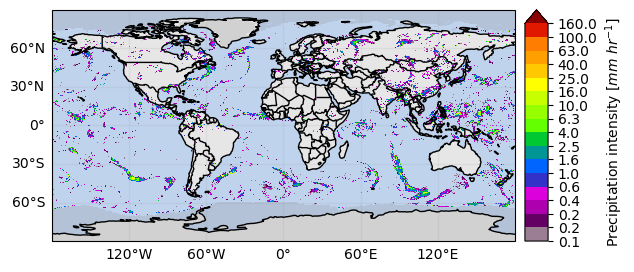

In [21]:
ds[variable].isel(time=0).gpm_api.plot_map()    # With cartopy

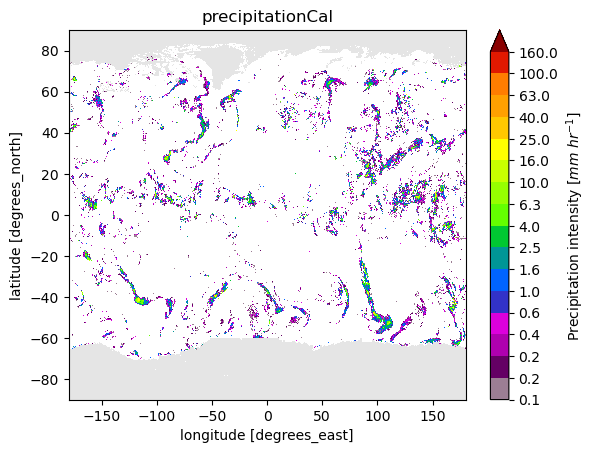

In [22]:
ds[variable].isel(time=0).gpm_api.plot_image()  # Without cartopy

To plot multiple timesteps, it is necessary to specify the argument `col` and `col_wrap` or `row` and `row_wrap`.
The `col`/`row` argument specifies the dimension to be used to plot over the columns/rows, while the `col_wrap`/`row_wrap` argument enables to specify the number of plots to be displayed per column/row.

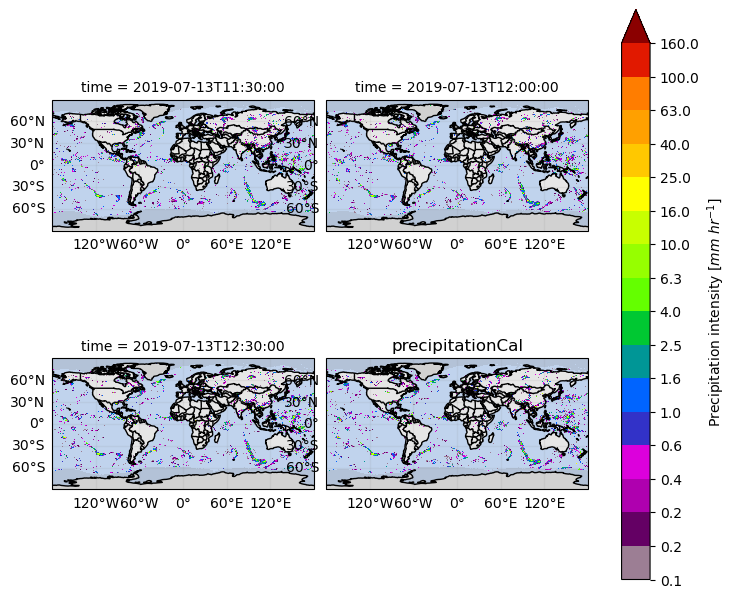

In [23]:
ds[variable].isel(time=slice(0,4)).gpm_api.plot_map(col="time", col_wrap=2)

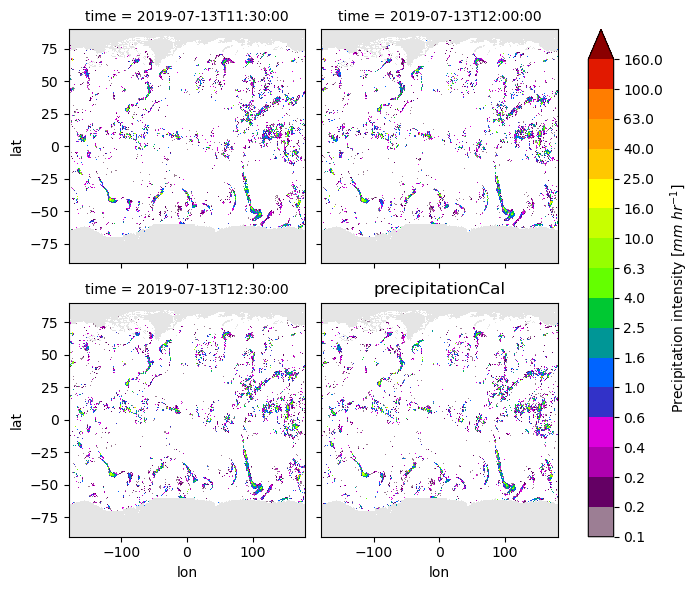

In [24]:
ds[variable].isel(time=slice(0,4)).gpm_api.plot_image(col="time", col_wrap=2)

To facilitate the creation of a figure title, GPM-API also provide a `title` method:

In [25]:
# Title for multi-timestep dataset 
# - The add_timestep argument is not exploited !
print(ds[variable].gpm_api.title(add_timestep=False))
print(ds[variable].gpm_api.title(add_timestep=True))  

IMERG-FR PrecipitationCal
IMERG-FR PrecipitationCal


In [26]:
# Title for a single-timestep dataset
print(ds[variable].isel(time=0).gpm_api.title(add_timestep=True))

IMERG-FR PrecipitationCal (2019-07-13 11:30)


To instead zoom on a specific regions of a `plot_map` figure, you can use the axis method `set_extent`. 

Extent:  (-171.99111060299998, -66.76465999999999, 18.71619, 71.5577635769)


Text(0.5, 1.0, 'IMERG-FR')

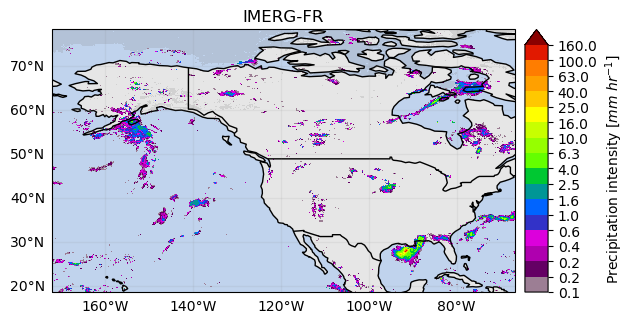

In [27]:
from gpm_api.utils.countries import get_country_extent
title = ds.gpm_api.title(add_timestep=False)
extent = get_country_extent("United States")
print("Extent: ", extent)
da = ds[variable].isel(time=0)
p = da.gpm_api.plot_map()  
p.axes.set_extent(extent)
p.axes.set_title(label=title)


You can also customize the geographic projection, by specifying the wished Cartopy projection.
The available projections are [listed here]( https://scitools.org.uk/cartopy/docs/latest/reference/projections.html?highlight=projections)

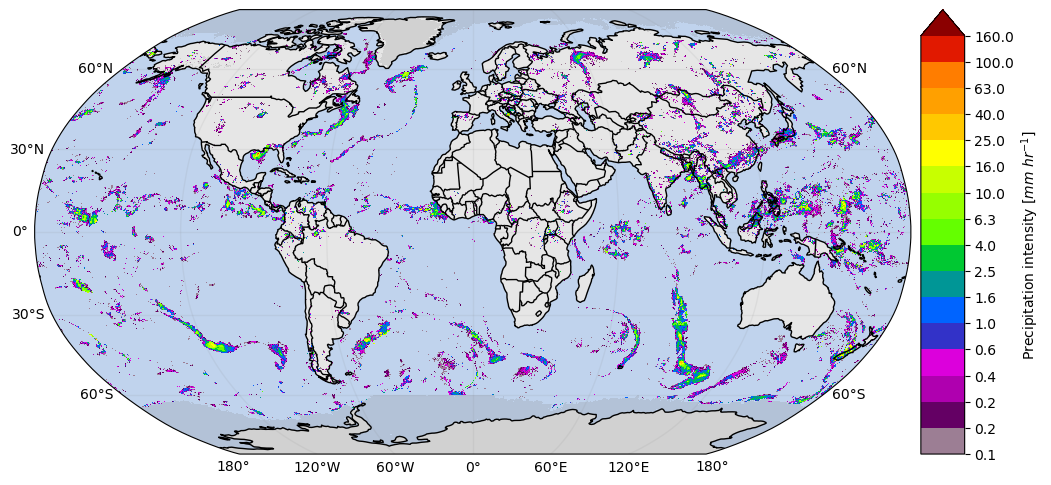

In [28]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from gpm_api.visualization.plot import plot_cartopy_background

# Define some figure options
dpi = 100
figsize = (12, 10)

# Examples of Cartopy projections
crs_proj = ccrs.InterruptedGoodeHomolosine()
crs_proj = ccrs.Mollweide()
crs_proj = ccrs.Robinson()

# Select a single timestep 
da = ds[variable].isel(time=0)

# Create the map
fig, ax = plt.subplots(subplot_kw={"projection": crs_proj}, figsize=figsize, dpi=dpi)
plot_cartopy_background(ax)
da.gpm_api.plot_map(ax=ax)

It is possible to further customize these figures in multiply ways. For example by specifying the own colormap:

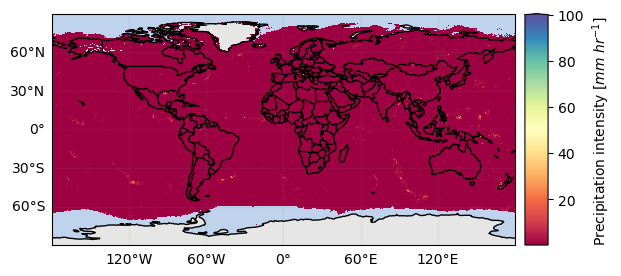

In [29]:
da = ds[variable].isel(time=0)
da.gpm_api.plot_map(cmap="Spectral", vmin=0.1, vmax=100)

However, note that GPM-API can provide a large set of pre-defined colormaps and colorbar settings.
For example, you can retrieve the colormap used originally by NASA to display the IMERG product:

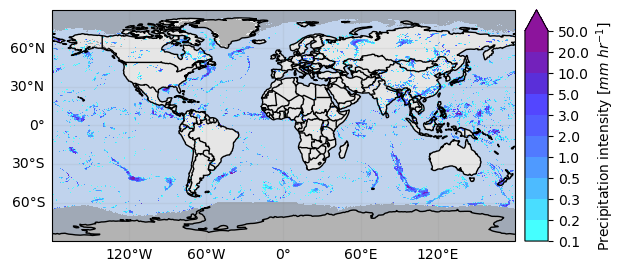

In [30]:
from gpm_api.utils.utils_cmap import get_colorbar_settings
plot_kwargs, cbar_kwargs =  get_colorbar_settings("IMERG_Solid")
da.gpm_api.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs)

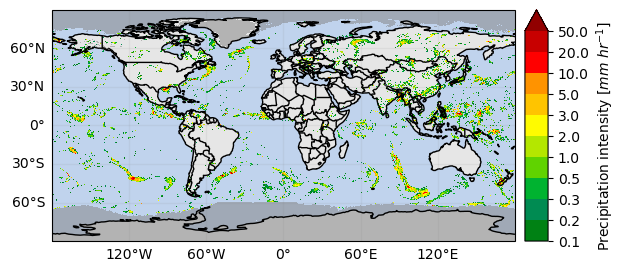

In [31]:
plot_kwargs, cbar_kwargs =  get_colorbar_settings("IMERG_Liquid")
da.gpm_api.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs)

With some manipulations, it's possible to display a single map showing the phase of precipitation using the `probabilityLiquidPrecipitation` variable.

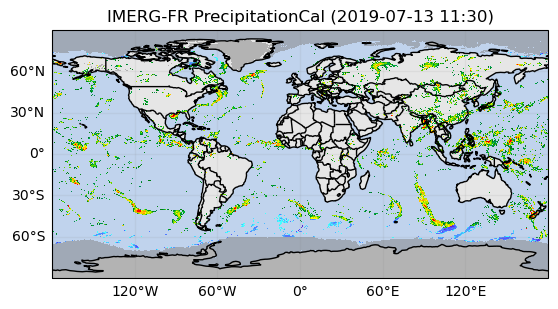

In [32]:
ds_single_timestep = ds.isel(time=0)
da_is_liquid = ds_single_timestep["probabilityLiquidPrecipitation"] > 90
da_precip = ds_single_timestep[variable]
da_liquid = da_precip.where(da_is_liquid, 0) # set to 0 where is not True
da_solid = da_precip.where(~da_is_liquid, 0) # set to 0 where is True

plot_kwargs, cbar_kwargs =  get_colorbar_settings("IMERG_Liquid")
p = da_liquid.gpm_api.plot_map(cbar_kwargs=cbar_kwargs, **plot_kwargs, add_colorbar=False)
plot_kwargs, cbar_kwargs =  get_colorbar_settings("IMERG_Solid")
p = da_solid.gpm_api.plot_map(ax=p.axes, cbar_kwargs=cbar_kwargs, **plot_kwargs, add_colorbar=False)
_ = p.axes.set_title(label=da_solid.gpm_api.title())

## 5. Dataset cropping

GPM-API provides methods to spatially subset the data by extent, country or continent.

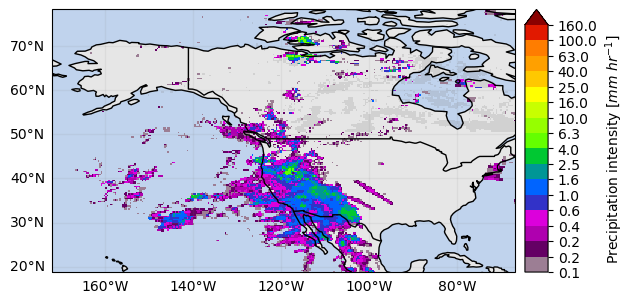

In [33]:
# Crop by extent                                      
extent = get_country_extent("United States")
ds_us = ds.gpm_api.crop(extent=extent)
ds_us[variable].isel(time=0).gpm_api.plot_map()


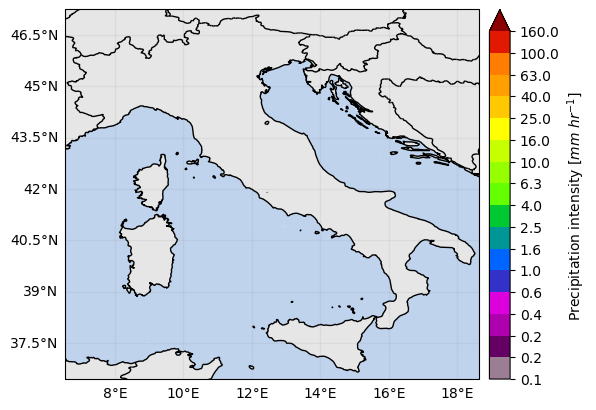

In [34]:
# Crop by country name
ds_it = ds.gpm_api.crop_by_country("Italy")
ds_it[variable].isel(time=0).gpm_api.plot_map()

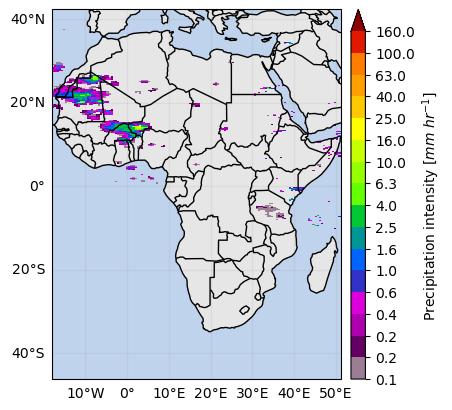

In [35]:
# Crop by continent
ds_it = ds.gpm_api.crop_by_continent("Africa")
ds_it[variable].isel(time=0).gpm_api.plot_map()

## 6. Precipitating area patch extraction

GPM-API comes with utilities helping the extraction and tracking of precipitating areas. 
Go through the dedicated tutorial to discover all the details !!!